## Visualize cross

- distribution of detection

In [1]:

import sys

sys.path.append("/home/jeans/internship/parking-customer-count")

from countpassenger.Config import conf
from countpassenger import Preprocess

import countpassenger
import pandas as pd
import os.path as osp
import os

df_cross = pd.read_csv(
    osp.join(conf.RESOURCES_RAW_DIR, "mbk-tourist-raw-cross-object-20240429.csv")
)

/home/jeans/internship/parking-customer-count


In [2]:
# list(df_cross)

In [3]:
df_cross.head()

,timestamp_precise,_id,id,count_id,ymax,ymin,travel_distance,travel_trajectory,original_video_name,xmin,...,timestamp,frame_no,lifetime,true_video_name,camera,travel_displacement,video_name,xmax,full_image_names,tracking_id
0,2024-04-29 16:57:43.839000,662fda258d1d64541a821630,310g0_mbk-14-12_1714409701_1714409863_1310,310g0,1222,452,1624.366708,217.874984,mbk-14-12_1714409701.mp4,330,...,2024-04-29 16:55:01,1310,1.599,mbk-14-12_1714409701.mp4,mbk-14-12,1588.906087,mbk-14-12_1714409701.mp4,789,[],310
1,2024-04-29 16:45:29.997000,662fdd218d1d64541a979cd2,184g0_mbk-14-14_1714409101_1714409129_239,184g0,100,0,436.509887,355.481929,mbk-14-14_1714409101.mp4,2383,...,2024-04-29 16:45:01,239,3.759,mbk-14-14_1714409101.mp4,mbk-14-14,431.119146,mbk-14-14_1714409101.mp4,2449,[],184
2,2024-04-29 16:45:37.555000,662fdbf58d1d64541a8f1499,543g0_mbk-14-13_1714409101_1714409137_299,543g0,480,44,8052.897421,19.271324,mbk-14-13_1714409101.mp4,1754,...,2024-04-29 16:45:01,299,221.342,mbk-14-13_1714409101.mp4,mbk-14-13,507.395290,mbk-14-13_1714409101.mp4,1913,[],543
3,2024-04-29 16:42:21.606000,662fdd128d1d64541a9752f9,155g0_mbk-14-14_1714408801_1714408941_1132,155g0,187,0,768.732021,338.629378,mbk-14-14_1714408801.mp4,2283,...,2024-04-29 16:40:01,1132,2.520,mbk-14-14_1714408801.mp4,mbk-14-14,173.538468,mbk-14-14_1714408801.mp4,2386,[],155
4,2024-04-29 16:44:08.296000,662fdd128d1d64541a975300,176g0_mbk-14-14_1714408801_1714409048_1986,176g0,96,0,588.819043,359.249443,mbk-14-14_1714408801.mp4,2402,...,2024-04-29 16:40:01,1986,6.998,mbk-14-14_1714408801.mp4,mbk-14-14,536.392051,mbk-14-14_1714408801.mp4,2463,[],176


In [4]:
df_cross = Preprocess.df_clean_customer(df_customer=df_cross)
print(df_cross.to_string())
#mbk-14-14-vehicle-snapshot 2024-04-29 09:44:22.571   292  1030     0  1149   37.511000          NaN                      NaN          van                 0.996053

           timestamp_precise  ymax  ymin  travel_distance  travel_trajectory       original_video_name  xmin            timestamp  frame_no    lifetime           true_video_name     camera  travel_displacement                video_name  xmax camera_cleaned  timestamp_unix
0    2024-04-29 16:57:43.839  1222   452      1624.366708         217.874984  mbk-14-12_1714409701.mp4   330  2024-04-29 16:55:01      1310    1.599000  mbk-14-12_1714409701.mp4  mbk-14-12          1588.906087  mbk-14-12_1714409701.mp4   789      mbk-14-12      1714409863
1    2024-04-29 16:45:29.997   100     0       436.509887         355.481929  mbk-14-14_1714409101.mp4  2383  2024-04-29 16:45:01       239    3.759000  mbk-14-14_1714409101.mp4  mbk-14-14           431.119146  mbk-14-14_1714409101.mp4  2449      mbk-14-14      1714409129
2    2024-04-29 16:45:37.555   480    44      8052.897421          19.271324  mbk-14-13_1714409101.mp4  1754  2024-04-29 16:45:01       299  221.342000  mbk-14-13_1714409101.mp4  mb

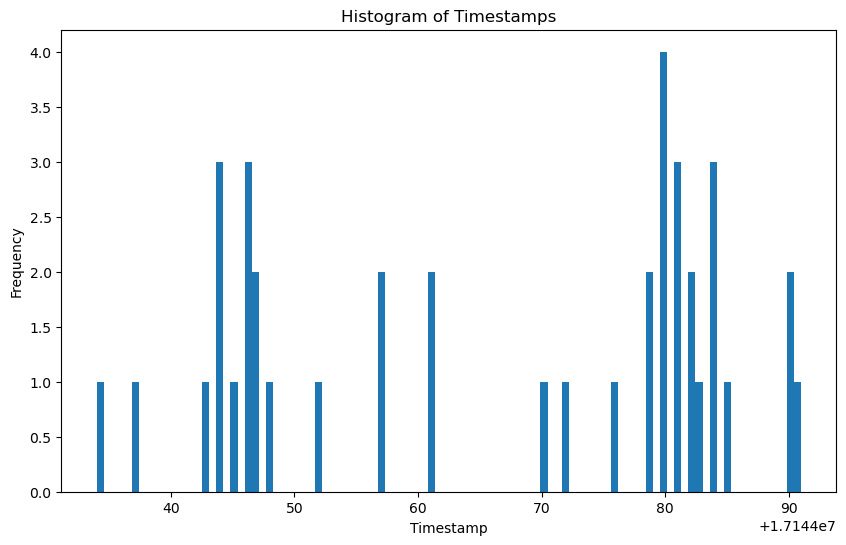

In [5]:
df_samecam = df_cross[df_cross['camera'] == 'mbk-14-13']
import matplotlib.pyplot as plt

# df_samecam['timestamp_precise'] = pd.to_datetime(df_samecam['timestamp_precise'])

plt.figure(figsize=(10, 6))  # Set the figure size to 10 inches wide and 6 inches tall
plt.hist(df_samecam[:40]['timestamp_unix']//100, bins=100)
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Histogram of Timestamps')
plt.show()

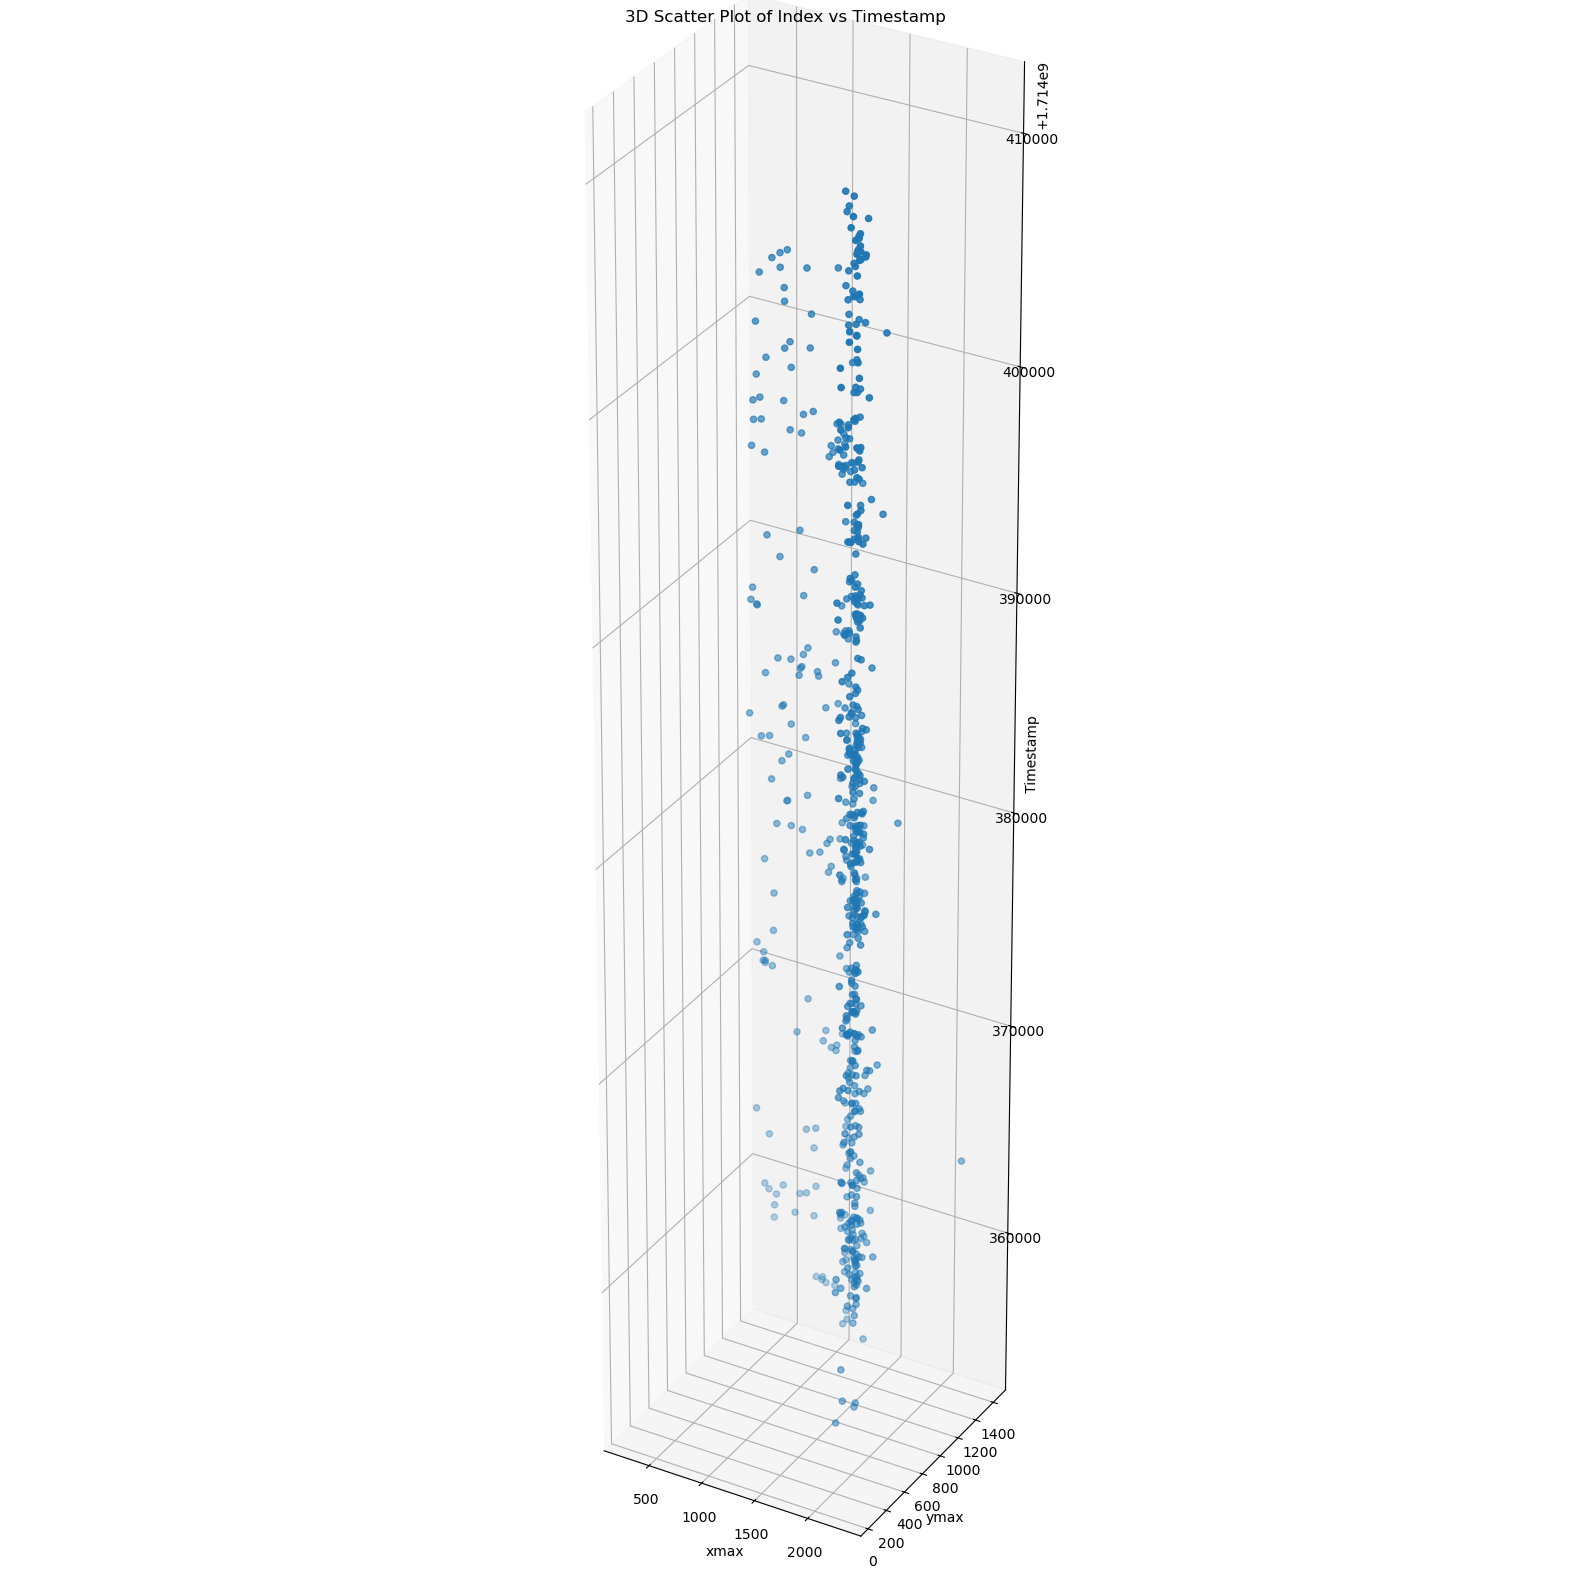

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df_cross = df_cross[df_cross['camera'] == 'mbk-14-13']

df_cross['timestamp_precise'] = pd.to_datetime(df_cross['timestamp_precise'])

fig = plt.figure(figsize=(20, 100))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cross['xmax'], df_cross['ymax'], df_cross['timestamp_unix'])
ax.set_xlabel('xmax')
ax.set_ylabel('ymax')
ax.set_zlabel('Timestamp')
ax.set_title('3D Scatter Plot of Index vs Timestamp')

# Set the aspect ratio of the axes
ax.set_box_aspect((1, 1, 5))  # Set the aspect ratio to 1, 1, 5
plt.show()

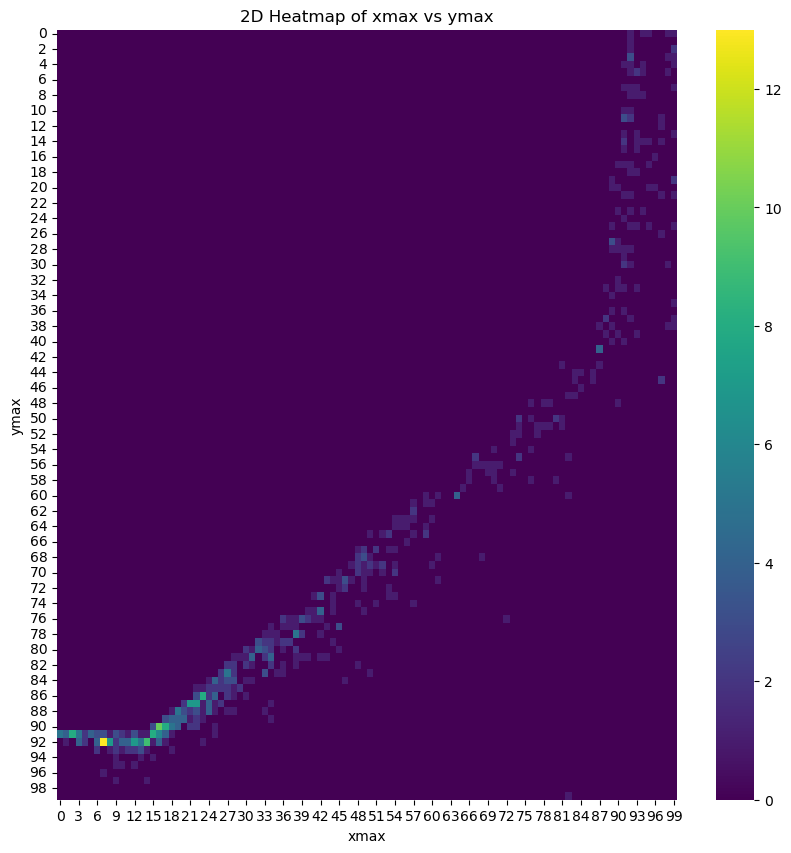

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a 2D grid of x and y values
x = df_cross['xmax']
y = df_cross['ymax']

# Create a 2D histogram of the data
hist, xedges, yedges = np.histogram2d(x, y, bins=100)

# Create a 2D heatmap of the data
plt.figure(figsize=(10, 10))
sns.heatmap(hist, cmap='viridis')
plt.xlabel('xmax')
plt.ylabel('ymax')
plt.title('2D Heatmap of xmax vs ymax')
plt.show()